Namespace(Diters=5, DitersAlt=100, batch_size=32, clamp_lower=-0.01, clamp_upper=0.01, decDRatio=0.0001, encDRatio=0.0001, gpu_ids=[0], imdir='/root/data/release_4_1_17/release_v2/aligned/2D', imsize=128, latentDistribution='gaussian', lrDec=0.0002, lrDecD=5e-05, lrEnc=0.0002, lrEncD=5e-05, model_name='aaegan', myseed=0, ndat=-1, nepochs=1000, nlatentdim=16, optimizer='adam', saveProgressIter=1, saveStateIter=10, save_dir='./test_aaegan/aaegan/', train_module='aaegan_train')
Epoch: 6.0


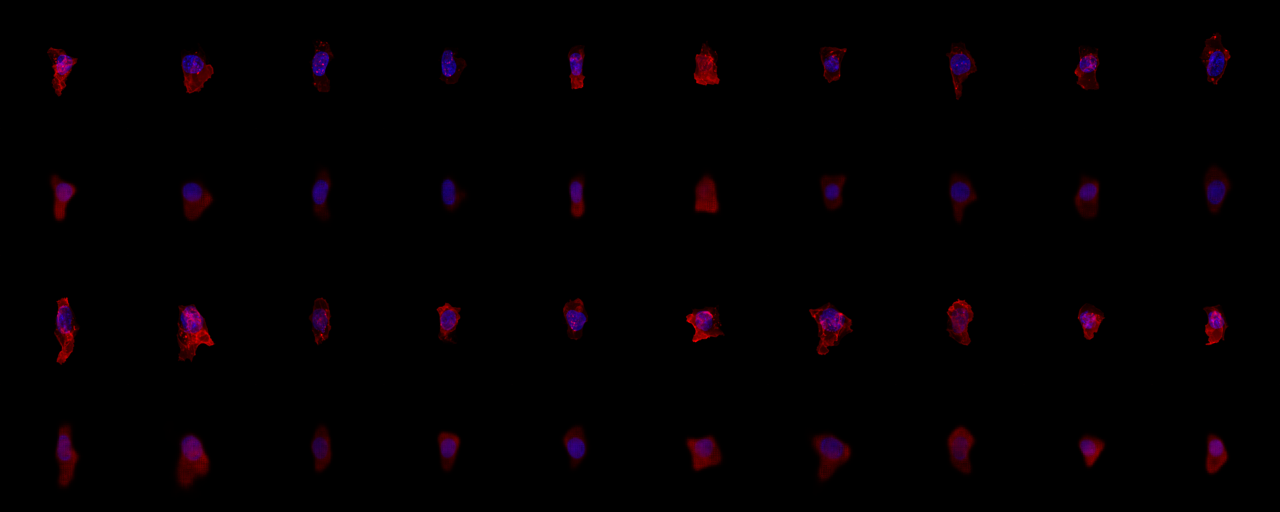

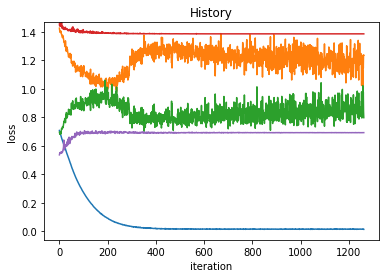

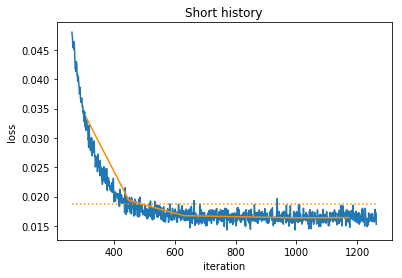

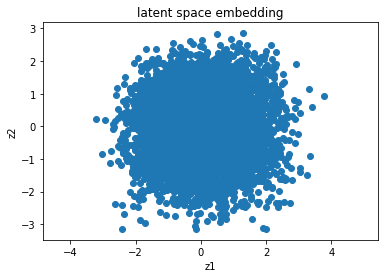

In [199]:
import SimpleLogger as SimpleLogger
import torch
from IPython.core.display import Image, display
import pickle
import matplotlib.pyplot as plt
import numpy as np



from sklearn.neighbors import KernelDensity

import sklearn

%matplotlib inline

model_dir = './waaegan2_32D6/'
model_dir = './test_waaegan/test_waaegan3/'
# model_dir = './test_waaegan/test_waaegan3_2/'
# model_dir = './test_waaegan/test_waaegan3_3/' 
# model_dir = './test_waaegan/test_waaegan3_5/' 
# model_dir = './test_waaegan/test_waaegan3_6/' 
model_dir = './test_waaegan/test_waaegan3_7/' #762 epochs, 32D
# model_dir = './test_waaegan/test_waaegan3_8/'
model_dir = './test_waaegan/test_waaegan3_9/'
model_dir = './test_waaegan/test_waaegan3_10/' #290 epochs, 16D
model_dir = './test_waaegan/test_waaegan3_11/'
model_dir = './test_waaegan/test_waaegan3_12/'
# model_dir = './test_waaegan/test_waaegan3_13/'
# model_dir = './test_waaegan/test_waaegan3_14/'
# model_dir = './test_waaegan/test_waaegan3_15/'
# model_dir = './test_waaegan/test_waaegan3_15/'
# model_dir = './test_waaegan/test_waaegan3_16/' 
# model_dir = './test_waaegan/test_waaegan3_17/' 
model_dir = './test_waaegan/test_waaegan3_18/' 

# model_dir = './test_waaegan/waaegan2_32D2/'
# model_dir = './test_waaegan/waaegan2_128D/'

# model_dir = './test_waaegan/waaegan_128D'

# model_dir = './test_waaegan/waaegan/'
# model_dir = './test_waaegan/waaegan_1E-4/'
# model_dir = './test_waaegan/semi_waaegan/'
model_dir = './test_aaegan/aaegan/'

history = 1000
bw = 100

opt = pickle.load( open( '{0}/opt.pkl'.format(model_dir), "rb" ) )
logger = pickle.load( open( '{0}/logger_tmp.pkl'.format(model_dir), "rb" ) )
embedding = pickle.load( open('./{0}/embedding_tmp.pkl'.format(model_dir), "rb"))

print(opt)

epoch = max(logger.log['epoch'])

print('Epoch: ' + str(epoch))

plt.figure(1)
plt.plot(logger.log['iter'], logger.log['reconLoss'])
plt.plot(logger.log['iter'], logger.log['encDLoss'])
plt.plot(logger.log['iter'], logger.log['minimaxEncDLoss'])
plt.plot(logger.log['iter'], logger.log['decDLoss'])
plt.plot(logger.log['iter'], logger.log['minimaxDecDLoss'])
# plt.ylim([-4, 4]) 
plt.title('History')
plt.xlabel('iteration')
plt.ylabel('loss')

ydat = [logger.log['encDLoss'], logger.log['decDLoss'], logger.log['minimaxEncDLoss'], logger.log['minimaxDecDLoss']]
ymin = np.min(ydat.append(logger.log['reconLoss']))
ymax = np.max(ydat)
plt.ylim([ymin, ymax])

x = logger.log['iter'][-history:]
y = logger.log['reconLoss'][-history:]

f = np.ones(bw)/bw
yhat = np.correlate(y-np.mean(y), f, mode='same').tolist() + np.mean(y)


epochs = np.floor(np.array(logger.log['epoch'][-history:-1]))
losses = np.array(logger.log['reconLoss'][-history:-1])
iters = np.array(logger.log['iter'][-history:-1])
uepochs = np.unique(epochs)

epoch_losses = np.zeros(len(uepochs))
epoch_iters = np.zeros(len(uepochs))
i = 0
for uepoch in uepochs:
    inds = np.equal(epochs, uepoch)
    loss = np.mean(losses[inds])
    epoch_losses[i] = loss
    epoch_iters[i] = np.mean(iters[inds])
    i+=1
    
mval = np.mean(losses)

plt.figure(2)
plt.plot(x, y)
plt.plot(epoch_iters, epoch_losses, color='darkorange')
plt.plot([np.min(iters), np.max(iters)], [mval, mval], color='darkorange', linestyle=':')

plt.title('Short history')
plt.xlabel('iteration')
plt.ylabel('loss')


plt.figure(3)
plt.scatter(embedding[:,0], embedding[:,1])
plt.xlim([-4, 4]) 
plt.ylim([-4, 4])     
plt.axis('equal')
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('latent space embedding')
# plt.savefig('./{0}/embedding_{1}.png'.format(opt.save_dir, epoch), dpi=75)



im_progress_path = '{0}/progress_{1}.png'.format(model_dir, epoch)
display(Image(im_progress_path, unconfined=True))



In [194]:
ydat.append(logger.log['reconLoss'])